In [ ]:
#chapter 1
import pydicom as dicom
import os
import pandas as pd

data_dir = '../input/sample_images/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('../input/stage1_labels.csv',index_col=0)

labels_df.head()

In [ ]:
#chapter 2
for patient in patients[:3]:
    label = labels_df.get_value(patient,'cancer')
    path = data_dir + patient
    
    slices = [dicom.read_file(path+'/'+s) for s in os.listdir(path)]
    slices.sort(key=lambda x:int(x.ImagePositionPatient[2]))
    
    print(slices[0].pixel_array.shape, len(slices))

In [ ]:
print(len(patients))

In [ ]:
#chapter 2
import matplotlib.pyplot as plt

for patient in patients[:3]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path+'/'+s )  for s in os.listdir(path)]
    slices.sort(key= lambda x: int(x.ImagePositionPatient[2]))
    
    plt.imshow(slices[0].pixel_array)
    plt.show()

In [ ]:
#chapter 2 
import cv2
import numpy as np

img_resize = 150

for patient in patients[:1]:
    label = labels_df.get_value(patient,'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path+'/'+s) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    fig = plt.figure()
    for num, each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_img = cv2.resize(np.array(each_slice.pixel_array),(img_resize,img_resize))
        y.imshow(new_img)
    plt.show()
    



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


136 20


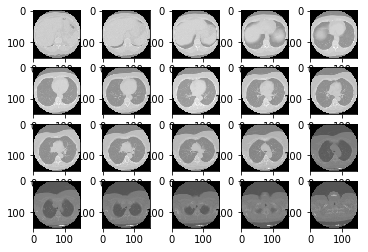

In [27]:
#chapter 3
#normalization the third dimension
import math

def chunks(l,n):
    for i in range(0,len(l),n):
        yield l[i:i+n]

def mean(l):
    return sum(l)/len(l)

img_pix_size = 150
norm_slices = 20

data_dir = '../input/sample_images/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('../input/stage1_labels.csv',index_col=0)

for patient in patients[:1]:
        try:
            label = labels_df.get_value(patient,'cancer')
            path = data_dir + patient
            slices = [dicom.read_file(path+'/'+s) for s in os.listdir(path)]
            slices.sort(key=lambda x : int(x.ImagePositionPatient[2]))
            new_slices = []
            #resize
            slices = [cv2.resize(np.array(each_slice.pixel_array), (img_pix_size,img_pix_size) ) for each_slice in slices]
            #chunk
            chunk_sizes = math.ceil(len(slices) / norm_slices)
            for slice_chunk in chunks(slices, chunk_sizes):
                slice_chunk = list(map(mean,zip(*slice_chunk)))
                new_slices.append(slice_chunk)
                
            if len(new_slices) == HM_SLICES-1:
                new_slices.append(new_slices[-1])

            if len(new_slices) == HM_SLICES-2:
                new_slices.append(new_slices[-1])
                new_slices.append(new_slices[-1])

            if len(new_slices) == HM_SLICES+2:
                new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
                del new_slices[HM_SLICES]
                new_slices[HM_SLICES-1] = new_val

            if len(new_slices) == HM_SLICES+1:
                new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
                del new_slices[HM_SLICES]
                new_slices[HM_SLICES-1] = new_val

            print(len(slices),len(new_slices))
            fig = plt.figure()
            for num, each_slice in enumerate(new_slices):
                y = fig.add_subplot(4,5,num+1)
                y.imshow(each_slice,cmap='gray')
            plt.show()
        except:
            pass

In [32]:
#chapter 4
#Final data processing
import cv2
import pydicom as dicom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

img_pix_size = 50
norm_slice = 20

def chunks(l,n):
    for i in range(0,len(l),n):
        yield l[i:i+n]
        
def mean(l):
    return sum(l)/len(l)

def process_data(patient,labels_df,img_pix_size=50,norm_slices=20,visual = False):
    label = labels_df.get_value(patient,'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path+'/'+s) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePosition[2]))
    
    new_slices = []
    
    slices = [cv2.resize( np.array(each_slice.pixel_array) , (img_pix_size, img_pix_size)) for each_slice in slices]
    
    chunk_sizes = math.ceil(len(slices)/norm_slices)
    for slice_chunk in chunks(slices,chunk_sizes):
        slice_chunk = list(map(mean,zip(*slice_chunk)))
        new_slices.append(slice_chunk)
        
    if len(new_slices) == hm_slices-1:
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices+2:
        new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1] = new_val
        
    if len(new_slices) == hm_slices+1:
        new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1] = new_val
        
    if visual:
        fig = plt.figure()
        for num, each_slice in enumerate(new_slices):
            y = fig.add_subplot(4,5,num_1)
            y.imshow(each_slice,cmap='gray')
        plt.show()
    
    if label == 1: label = np.array([0,1])
    elif label == 0: label = np.array([1,0])
        
    return np.array(new_slices),label


data_dir = '../input/sample_images/'
patients = os.listdir(data_dir)
labels = pd.read_csv('../input/stage1_labels.csv',index_col=0)

much_data = []

for num,patient in enumerate(patients):
    if num%100 ==0 :
        print(num)
    try:
        img_data,label = process_data(patient,labels,img_pix_size=img_pix_size,norm_slices=norm_slice)
        much_data.append([img_data,label])
    except KeyError as e:
        print('Error!Unlabeled!')
    
np.save('much_data-{}-{}-{}.npy'.format(img_pix_size,img_pix_size,norm_slice), much_data)

0
Error!Unlabeled!


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!
Error!Unlabeled!


In [28]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
import pydicom as dicom
import os
import matplotlib.pyplot as plt
import cv2
import math

IMG_SIZE_PX = 50
SLICE_COUNT = 20

def chunks(l, n):
    # Credit: Ned Batchelder
    # Link: http://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]


def mean(a):
    return sum(a) / len(a)


def process_data(patient,labels_df,img_px_size=50, hm_slices=20, visualize=False):
    
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))

    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array),(img_px_size,img_px_size)) for each_slice in slices]
    
    chunk_sizes = math.ceil(len(slices) / hm_slices)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)

    if len(new_slices) == hm_slices-1:
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices+2:
        new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1] = new_val
        
    if len(new_slices) == hm_slices+1:
        new_val = list(map(mean, zip(*[new_slices[hm_slices-1],new_slices[hm_slices],])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1] = new_val

    if visualize:
        fig = plt.figure()
        for num,each_slice in enumerate(new_slices):
            y = fig.add_subplot(4,5,num+1)
            y.imshow(each_slice, cmap='gray')
        plt.show()

    if label == 1: label=np.array([0,1])
    elif label == 0: label=np.array([1,0])
        
    return np.array(new_slices),label

#                                               stage 1 for real.
data_dir = '../input/sample_images/'
patients = os.listdir(data_dir)
labels = pd.read_csv('../input/stage1_labels.csv', index_col=0)

much_data = []
for num,patient in enumerate(patients):
    if num % 100 == 0:
        print(num)
    try:
        img_data,label = process_data(patient,labels,img_px_size=IMG_SIZE_PX, hm_slices=SLICE_COUNT)
        #print(img_data.shape,label)
        much_data.append([img_data,label])
    except KeyError as e:
        print('This is unlabeled data!')

np.save('muchdata-{}-{}-{}.npy'.format(IMG_SIZE_PX,IMG_SIZE_PX,SLICE_COUNT), much_data)

0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


This is unlabeled data!


In [4]:
#chapter final
#feed the data into the neural network
#specifically, this is the ready 3D data 
import tensorflow as tf
import numpy as np

img_pix_size = 50
norm_slice = 20

n_classes = 2
batch_size = 10

x = tf.placeholder('float')
y = tf.placeholder('float')

keep_prob = 0.8

def conv3d(x,W):
    return tf.nn.conv3d(x,W,strides=[1,1,1,1,1],padding='SAME')
def maxpool3d(x):
    return tf.nn.max_pool3d(x,ksize=[1,2,2,2,1],strides=[1,2,2,2,1],padding='SAME')



In [5]:
def convolutional_neural_network(x):
    weights = {
        'W_conv1':tf.Variable(tf.random_normal([3,3,3,1,32])),
        'W_conv2':tf.Variable(tf.random_normal([3,3,3,32,64])),
        'W_fc':tf.Variable(tf.random_normal([54080,1024])),
        'out':tf.Variable(tf.random_normal([1024,n_classes]))
    }
    
    biases = {
        'b_conv1':tf.Variable(tf.random_normal([32])),
        'b_conv2':tf.Variable(tf.random_normal([64])),
        'b_fc':tf.Variable(tf.random_normal([1024])),
        'out':tf.Variable(tf.random_normal([n_classes]))
    }
    
    x = tf.reshape(x, shape=[-1, img_pix_size,img_pix_size,norm_slice, 1])
    
    conv1 = tf.nn.relu(conv3d(x, weights['W_conv1']) +biases['b_conv1'] )
    conv1 = maxpool3d(conv1)
    
    conv2 = tf.nn.relu(conv3d(conv1, weights['W_conv2']) +biases['b_conv2'] )
    conv2 = maxpool3d(conv2)
    
    fc = tf.reshape(conv2, [-1,54080])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc']) + biases['b_fc'])
    fc = tf.nn.dropout(fc, keep_prob)
    
    output = tf.matmul(fc , weights['out']) + biases['out']
    
    return output

In [6]:
much_data = np.load('muchdata-50-50-20.npy')

train_data = much_data[:-5]
validation_data = much_data[-5:]

def train_neural_network(x):
    prediction = convolutional_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(labels= prediction, logits=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)
    
    epochs = 10
    with tf.Session as sess:
        sess.run(tf.initialize_all_variables())
        
        success_runs = 0
        total_runs = 0
        
        for epoch in range(epochs):
            epoch = 0
            for data in train_data:
                total_runs += 1
                try:
                    X = data[0]
                    Y = data[1]
                    _,c = sess.run([optimizer,cost], feed_dict={x:X,y:Y})
                    epoch_loss += c
                    success_runs += 1
                except Exception as e:
                    pass
            
            print('Epoch ',epoch+1, 'completed', epochs, 'loss', epoch_loss)
            
            correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct,'float'))
            
            print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[1] for i in validation_data]}))
            print('fitment percent:', success_runs/total_runs)
        print('Done. Finishing accuracy:')
        print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[1] for i in validation_data]}))
        
        print('fitment percent:',successful_runs/total_runs)

In [7]:
train_neural_network(x)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'Variable:0' shape=(3, 3, 3, 1, 32) dtype=float32_ref>", "<tf.Variable 'Variable_1:0' shape=(3, 3, 3, 32, 64) dtype=float32_ref>", "<tf.Variable 'Variable_2:0' shape=(54080, 1024) dtype=float32_ref>", "<tf.Variable 'Variable_3:0' shape=(1024, 2) dtype=float32_ref>", "<tf.Variable 'Variable_4:0' shape=(32,) dtype=float32_ref>", "<tf.Variable 'Variable_5:0' shape=(64,) dtype=float32_ref>", "<tf.Variable 'Variable_6:0' shape=(1024,) dtype=float32_ref>", "<tf.Variable 'Variable_7:0' shape=(2,) dtype=float32_ref>"] and loss Tensor("Mean:0", shape=(), dtype=float32).

In [22]:


much_data = np.load('muchdata-50-50-20.npy')
# If you are working with the basic sample data, use maybe 2 instead of 100 here... you don't have enough data to really do this
train_data = much_data[:-10]
validation_data = much_data[-10:]


def train_neural_network(x):
    prediction = convolutional_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(labels=prediction,logits=y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(cost)
    
    hm_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        
        successful_runs = 0
        total_runs = 0
        print(train_data.shape)
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for data in train_data:
                
                total_runs += 1
                try:
                    X = data[0]
                    Y = data[1]
                    _, c = sess.run([optimizer, cost], feed_dict={x: X, y: Y})
                    epoch_loss += c
                    successful_runs += 1
                except Exception as e:
                    # I am passing for the sake of notebook space, but we are getting 1 shaping issue from one 
                    # input tensor. Not sure why, will have to look into it. Guessing it's
                    # one of the depths that doesn't come to 20.
                    pass
                    #print(str(e))
            
            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)

            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

            print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[1] for i in validation_data]}))
            
        print('Done. Finishing accuracy:')
        print('Accuracy:',accuracy.eval({x:[i[0] for i in validation_data], y:[i[1] for i in validation_data]}))
        
        print('fitment percent:',successful_runs/total_runs)

In [23]:
train_neural_network(x)

(9, 2)
Epoch 1 completed out of 10 loss: -24809562240.0
Accuracy: 0.7
Epoch 2 completed out of 10 loss: -29021868800.0
Accuracy: 0.7
Epoch 3 completed out of 10 loss: -29413764096.0
Accuracy: 0.7
Epoch 4 completed out of 10 loss: -35831097344.0
Accuracy: 0.7
Epoch 5 completed out of 10 loss: -33058327424.0
Accuracy: 0.7
Epoch 6 completed out of 10 loss: -35694322432.0
Accuracy: 0.7
Epoch 7 completed out of 10 loss: -34675730752.0
Accuracy: 0.7
Epoch 8 completed out of 10 loss: -43719425792.0
Accuracy: 0.7
Epoch 9 completed out of 10 loss: -40470811904.0
Accuracy: 0.7
Epoch 10 completed out of 10 loss: -47745878528.0
Accuracy: 0.7
Done. Finishing accuracy:
Accuracy: 0.7
fitment percent: 1.0
